In [1]:
# --------------------------------------------------------
# This file is for Chapter 3 Classification
# --------------------------------------------------------

# install kaggle package and fetch mnist dataset from kaggle --
# a free online platform owned by Google that hosts data science competitions, provides datasets, 
# and offers a collaborative environment for machine learning and AI projects. It’s one of
# the largest communities for data scientists and ML practitioners worldwide.



In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset" shared by kaggle contributors
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)       

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'datasets/mnist/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

# show_images(images_2_show, titles_2_show)

In [4]:
# mnist-original dataset is downloaded from 
# https://www.kaggle.com/datasets/avnishnish/mnist-original?select=mnist-original.mat
# Thank kaggle contributor 
# This is a ".mat" file, in order to load this file in an ipynb you have to 
# use loadmat() function from scipy.io
# We'll use this dataset to learn this book

from scipy.io import loadmat
mnist = loadmat("datasets/mnist-original/mnist-original.mat")     # get mnist data
X = mnist_data = mnist["data"].T
y = mnist_label = mnist["label"][0]
# we finally get there!

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

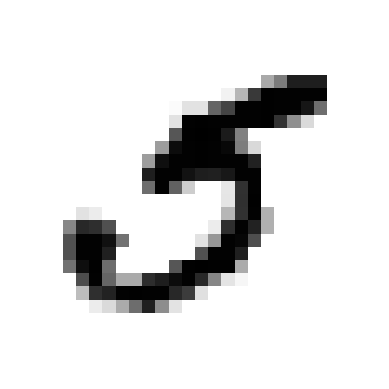

5.0

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]      # 30000 for four, 36000 for five, 40000 for six, 42000 for seven
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
y[36000]

In [8]:
# get a traing set and a test set accordingly
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier( max_iter=5000, random_state = 42)
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,5000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [12]:
sgd_clf.predict([some_digit])

array([5.])

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20)

clf = SGDClassifier(loss="log_loss", max_iter=5000, tol=1e-3)
clf.fit(X_train, y_train)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,5000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [14]:
print(clf.score(X_test, y_test))


0.8704


In [15]:
# StratifiedKFold class is for stratified sampling to produce folds that contain 
# a representative ratio of each class. At each iteration the code creates a clone
# of the classifier, trains that clone on the training folds, and makes predications
# on the test fold. Than it counts the number of correct predictions and outputs
# the ratio of correct predictions.

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95785
0.963
0.9663


In [16]:
# use cross_cal_score() to evaluate the SGDClassifier model by K-fold cross-validation
# with three folds. the K-fold cross-validation means splitting training set into K-folds,
# then making predictions and evaluating them on each fold using a model trained
# on the remaining folds.

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.9658, 0.963 , 0.9524])

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91155, 0.90905, 0.90835])

In [18]:
# Confustion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [19]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_train_5, y_train_pred)

In [20]:
cmat

array([[53432,  1147],
       [ 1229,  4192]])

In [21]:
y_train_perfect_predictions = y_train_5    # only have true positive and true negative predictions
confusion_matrix(y_train_5, y_train_perfect_predictions)  # get a perfect confusion matrix

array([[54579,     0],
       [    0,  5421]])

In [22]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# precision_score = TP / (TP + FP)
precision_score(y_train_5, y_train_pred)

0.7851657613785353

In [23]:
# recall_score = TP / (TP + FN)
recall_score(y_train_5, y_train_pred)

0.7732890610588452

In [24]:
# accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_train_5, y_train_pred)

0.9604

In [25]:
# F1 score = TP / (TP + (FN + FP)/2)
f1_score(y_train_5, y_train_pred)

0.779182156133829

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[-10168.96932345, -39441.84351556,  -6660.59262244,
         -5985.57043397, -11564.94286253,   -359.51235476,
        -22368.13196037, -11371.64887669,  -7830.44960263,
        -18065.57528755]])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [28]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)   # Rising the threshold decreases recall
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,
                             method = "decision_function")

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

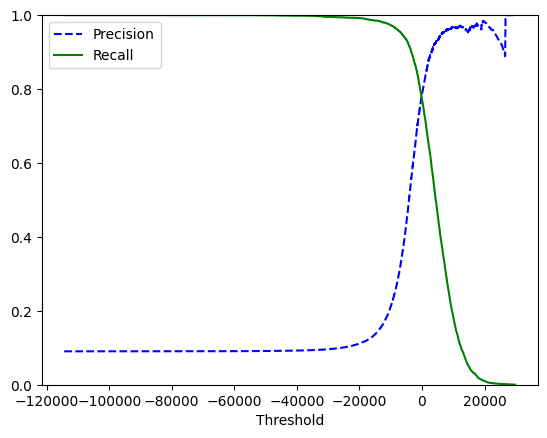

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [32]:
y_train_pred_90 = (y_scores > 4000)

In [33]:
precision_score(y_train_5, y_train_pred_90)

# if we use y_scores > 70000, - 70000 is way too high for MNIST scores, so we add zero_division parameter
#y_train_pred_90 = (y_scores > 70000)
#precision_score(y_train_5, y_train_pred_90, zero_division = 1)  

0.9209511568123393

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.5286847445120827

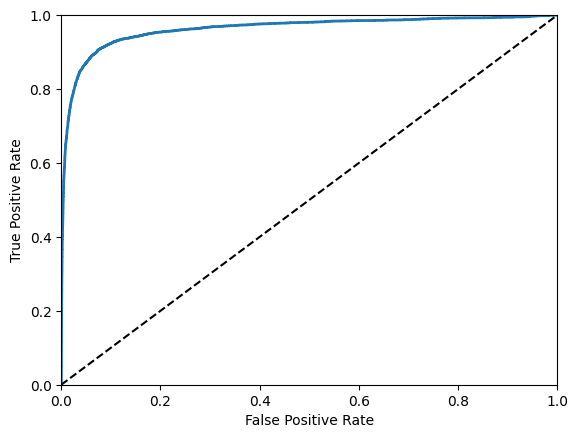

In [35]:
# the ROC(receiver operating characteristic) Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [36]:
# Roc Auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9625134127336136

ROC curve plotted and saved as roc_curve_logistic_regression.png


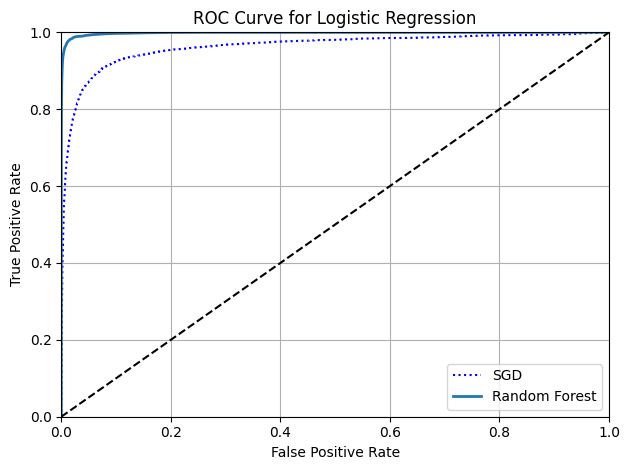

In [37]:
# train a RandomForestClassifier and compare its ROC curve and ROC AUC score to SGDClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3,
                                    method = "predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "best")  # for loc supported values are 'best', 'upper right',
#'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right',
#'lower center', 'upper center', 'center'
#plt.show()
plt.title('ROC Curve for Logistic Regression')
plt.grid(True)
plt.tight_layout()

# Save the plot
output_path = "output/roc_curve_logistic_regression.png"
plt.savefig(output_path)

print("ROC curve plotted and saved as roc_curve_logistic_regression.png")

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984247535948383

In [39]:
sgd_clf.fit(X_train, y_train)    # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([5.])

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-10168.96932345, -39441.84351556,  -6660.59262244,
         -5985.57043397, -11564.94286253,   -359.51235476,
        -22368.13196037, -11371.64887669,  -7830.44960263,
        -18065.57528755]])

In [41]:
np.argmax(some_digit_scores)

5

In [42]:
sgd_clf.classes_            # when a classifier is  trained, it stores the list of target classes
                            # in attribute classes_ array, ordered by value.

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [43]:
sgd_clf.classes_[5]

5.0

In [44]:
# use OneVsOne or OneVsAll functions to identify which strategy you want
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier( max_iter=2000, random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [45]:
len(ovo_clf.estimators_)

45

In [46]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [47]:
forest_clf.predict_proba([some_digit])

array([[0.01, 0.  , 0.02, 0.06, 0.01, 0.88, 0.  , 0.01, 0.  , 0.01]])

In [48]:
# evaluate these classifiers using cross-validation
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.8819, 0.8735, 0.8619])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.9014 , 0.90355, 0.8972 ])

In [50]:
# error analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [51]:
conf_mx

array([[5579,    0,   14,    7,    8,   35,   32,    7,  240,    1],
       [   0, 6407,   45,   21,    2,   45,    6,    9,  197,   10],
       [  26,   24, 5262,   82,   75,   22,   66,   43,  349,    9],
       [  28,   22,  109, 5230,    0,  199,   28,   40,  409,   66],
       [  13,   14,   46,   11, 5230,   10,   31,   19,  310,  158],
       [  28,   19,   28,  150,   53, 4487,   79,   18,  494,   65],
       [  30,   16,   51,    1,   38,   88, 5551,    7,  134,    2],
       [  18,   12,   52,   20,   41,   12,    5, 5720,  174,  211],
       [  19,   65,   41,   91,    2,  126,   31,    6, 5428,   42],
       [  24,   20,   23,   62,  123,   34,    1,  172,  341, 5149]])

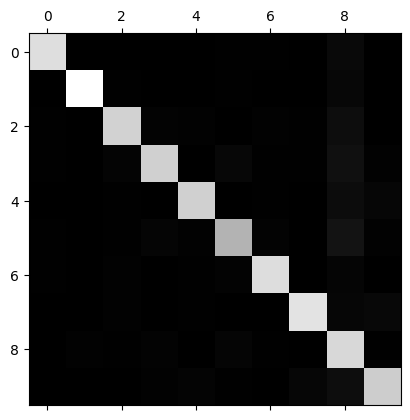

In [52]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [53]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

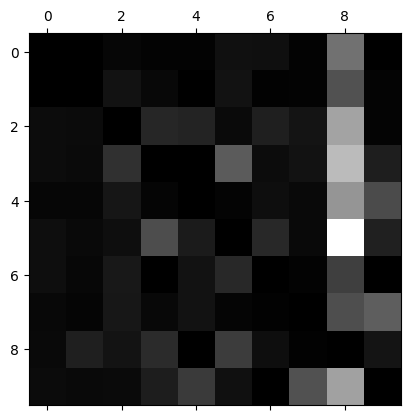

In [54]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [55]:
# this is a help function for plot_digits(), it's important for later cells
import numpy as np
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=10, **options):
    """
    Plot a grid of digit images from flattened vectors.
    
    Parameters:
    - instances: array-like, shape (n_samples, n_features)
      Each row is a flattened image (e.g., 28*28 = 784 features).
    - images_per_row: int, number of images per row in the grid.
    - options: passed to plt.imshow (e.g., cmap).
    """
    size = int(np.sqrt(instances.shape[1]))  # assumes square images
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    
    # pad with zeros if needed
    padded = np.concatenate([instances, np.zeros((n_empty, size*size))], axis=0)
    images = padded.reshape((n_rows, images_per_row, size, size))
    
    # stitch into one big image
    big_image = np.vstack([np.hstack(row) for row in images])
    plt.imshow(big_image, cmap="binary", **options)
    plt.axis("off")

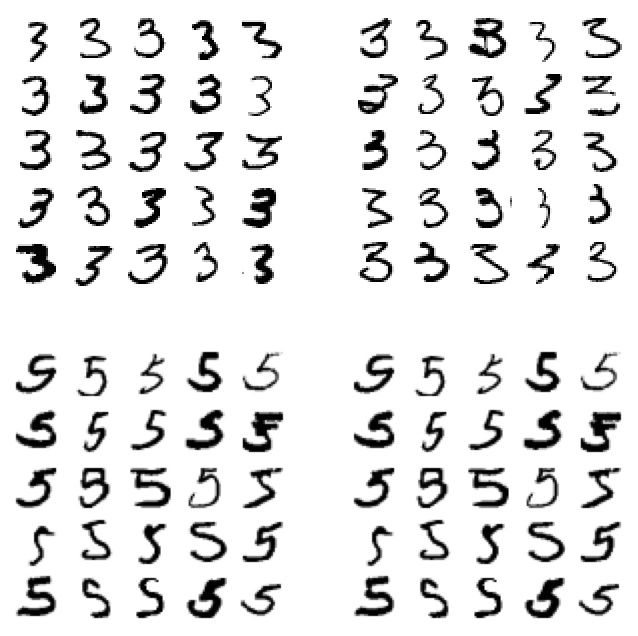

In [56]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

plt.figure(figsize = (8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

In [57]:
# Multilabel Classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [58]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [59]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_train_knn_pred, average = "macro")

0.9685374653668101

In [60]:
# extra code – shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.
# if y_train_knn_pred is 1D but you expect multilabel
# convert it to one-hot encoding

f1_score(y_train, y_train_knn_pred, average="weighted")

0.9686693264499188

In [61]:
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC   # <-- import SVC

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [62]:
ClassifierChain(estimator=SVC(), cv=3, random_state=42)

,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [63]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [64]:
# Multioutput Classification
# let's start by creating the training and test sets by taking the MNIST images
# and adding noise to their pixel intensities using NumPy's randint() function
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

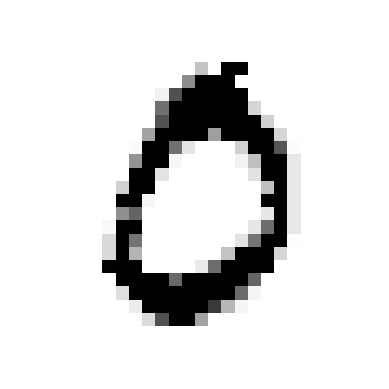

In [65]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digits(clean_digit)
plt.savefig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()

In [66]:
# Exercises 1 An MNIST classifier with over 97% accuracy
knn_clf = KNeighborsClassifier()   # use KNeighborsClassifier
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

In [67]:
# try to use hyperparameters, only use 10,000 images to speed up the search
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [3, 4, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [68]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [69]:
grid_search.best_score_

0.9516

In [70]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

In [71]:
# Exercise 2 Write a function to shift an MNIST image in any direction
# (left, right, up, down) by one pixel
# we use shift() in scipy.ndimage
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

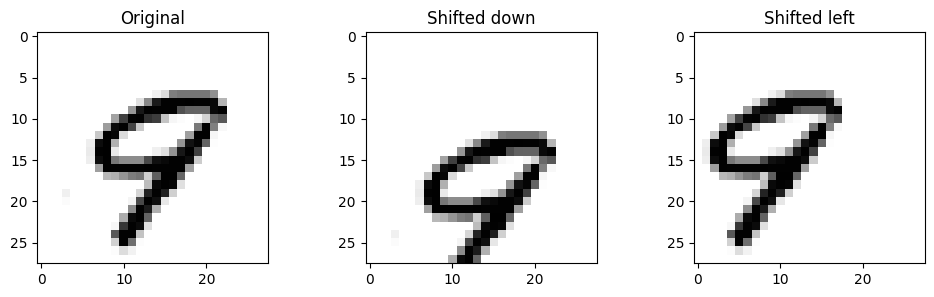

In [72]:
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [73]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [74]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [75]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [76]:
knn_clf.fit(X_train_augmented, y_train_augmented)

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [77]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

In [78]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")

error_rate_change = -17%


In [79]:
# Exercise 3 Tackle the Titanic dataset. A great place to start is on Kaggle
# Download the data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [80]:
train_data, test_data = load_titanic_data()

In [81]:
# see training data structure
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [84]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

In [85]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [87]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [88]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [89]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [91]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [92]:
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

In [93]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [94]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [95]:
y_train = train_data["Survived"]

In [96]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [97]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

In [98]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8137578027465668

In [99]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

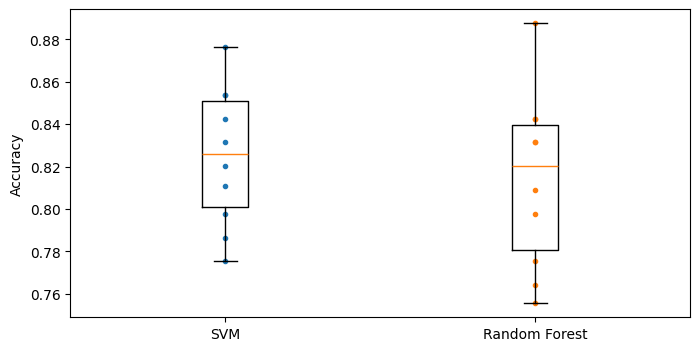

In [100]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], tick_labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

In [101]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [102]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(
    ['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [103]:
# Exercise 4 Build a spam classifier
# Download examples of spam and ham from Apache Spam Assassin's public datasets

In [104]:
# Download latest version from kaggle
import shutil
import kagglehub

# Download into KaggleHub cache
cache_path = kagglehub.dataset_download("beatoa/spamassassin-public-corpus")

# Copy into your desired folder
target_path = "./datasets/spamassassin"
shutil.copytree(cache_path, target_path, dirs_exist_ok=True)

print("Dataset copied to:", target_path)


/home/fliu2/.local/share/pipx/venvs/jupyterlab/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset copied to: ./datasets/spamassassin


In [105]:
def fetch_spam_data():
    spam_path = Path() / "datasets" / "spamassassin"
    for dir_name in ("easy_ham/easy_ham", "hard_ham/hard_pam","spam_2/spam_2"):
        if not (spam_path / dir_name).is_dir():
            path = (spam_path)
    return [spam_path / dir_name for dir_name in ("easy_ham/easy_ham", "hard_ham/hard_ham", "spam_2/spam_2")]

In [106]:
easy_ham_dir, hard_ham_dir, spam_dir = fetch_spam_data()

In [107]:
easy_ham_filenames = [f for f in sorted(easy_ham_dir.iterdir()) if len(f.name) > 20]
hard_ham_filenames = [f for f in sorted(hard_ham_dir.iterdir()) if len(f.name) > 20]
spam_filenames = [f for f in sorted(spam_dir.iterdir()) if len(f.name) > 20]

In [108]:
len(easy_ham_filenames)

2551

In [109]:
len(hard_ham_filenames)

250

In [110]:
len(spam_filenames)

1396

In [111]:
import email
import email.policy

def load_email(filepath):
    with open(filepath, "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [114]:
easy_ham_emails = [load_email(filepath) for filepath in easy_ham_filenames]
hard_ham_emails = [load_email(filepath) for filepath in hard_ham_filenames]
spam_emails = [load_email(filepath) for filepath in spam_filenames]

In [115]:
print(easy_ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [116]:
print(hard_ham_emails[1].get_content().strip())

<html>
<head>
	<title>Shopper Newsletter: Alerts</title>

</head>
<body bgcolor="#EEEEEE" alink="#0000FF" vlink="#0000FF">
<center>
<A href="top"></A><!-- header -->
	<table border=0 cellpadding=0 cellspacing=0 width=612 bgcolor="#ffffff">
	<tr valign=top>
		<td width=442 colspan=5>
			<img src="http://www.cnet.com/i/sh/nl/442_shopperALERT.gif" width="442" height="60" border="0" alt="CNET Shopper Newsletter Alerts"><br>
				<table width=442 cellpadding=0 cellspacing=0 border=0 bgcolor="#CCCCCC">
					<tr>
						<td bgcolor="#999999" colspan=1>
							<img src="http://home.cnet.com/b.gif" width="1" height="1" border="0"><br>
						</td>
						<td bgcolor="#666666" colspan=1>
							<img src="http://home.cnet.com/b.gif" width="1" height="1" border="0"><br>
						</td>
						<td bgcolor="#666666" colspan=2>
							<img src="http://home.cnet.com/b.gif" width="1" height="1" border="0"><br>
						</td>
					</tr>
					<tr>
						<td bgcolor="#999999" width=1 rowspan=2>
							<img src="http:

In [117]:
print(spam_emails[6].get_content().strip())

NEW PRODUCT ANNOUNCEMENT

From: OUTSOURCE ENG.& MFG. INC.


Sir/Madam;

This note is to inform you of new watchdog board technology for maintaining
continuous unattended operation of PC/Servers etc. that we have released for
distribution.
  
We are proud to announce Watchdog Control Center featuring MAM (Multiple
Applications Monitor) capability.
The key feature of this application enables you to monitor as many
applications as you
have resident on any computer as well as the operating system for
continuous unattended operation.  The Watchdog Control Center featuring
MAM capability expands third party application "control" of a Watchdog as
access to the application's
source code is no longer needed.

Here is how it all works:
Upon installation of the application and Watchdog, the user may select
many configuration options, based on their model of Watchdog, to fit their
operational needs.  If the MAM feature is enabled, the user may select any
executable program that they wish for monit

In [118]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        multipart = ", ".join([get_email_structure(sub_email)
                               for sub_email in payload])
        return f"multipart({multipart})"
    else:
        return email.get_content_type()

In [119]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [120]:
structures_counter(easy_ham_emails).most_common()

[('text/plain', 2453),
 ('multipart(text/plain, application/pgp-signature)', 72),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [121]:
structures_counter(hard_ham_emails).most_common()

[('text/html', 120),
 ('text/plain', 86),
 ('multipart(text/plain, text/html)', 38),
 ('multipart(text/html)', 2),
 ('multipart(text/plain, image/png, image/png)', 1),
 ('multipart(multipart(text/plain, text/html))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, image/bmp)', 1)]

In [122]:
structures_counter(spam_emails).most_common()

[('text/plain', 597),
 ('text/html', 589),
 ('multipart(text/plain, text/html)', 114),
 ('multipart(text/html)', 29),
 ('multipart(text/plain)', 25),
 ('multipart(multipart(text/html))', 18),
 ('multipart(multipart(text/plain, text/html))', 5),
 ('multipart(text/plain, application/octet-stream, text/plain)', 3),
 ('multipart(text/html, text/plain)', 2),
 ('multipart(text/html, image/jpeg)', 2),
 ('multipart(multipart(text/plain), application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/jpeg)',
  1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/gif)',
  1),
 ('text/plain charset=us-ascii', 1),
 ('multipart(multipart(text/html), image/gif)', 1),
 ('multipart(multipart(text/plain, text/html), application/octet-stream, application/octet-stream, applic

In [123]:
for header, value in spam_emails[0].items():
    print(header, ":", value)

Return-Path : <ilug-admin@linux.ie>
Delivered-To : yyyy@localhost.netnoteinc.com
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 9E1F5441DD	for <jm@localhost>; Tue,  6 Aug 2002 06:48:09 -0400 (EDT)
Received : from phobos [127.0.0.1]	by localhost with IMAP (fetchmail-5.9.0)	for jm@localhost (single-drop); Tue, 06 Aug 2002 11:48:09 +0100 (IST)
Received : from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g72LqWv13294 for    <jm-ilug@jmason.org>; Fri, 2 Aug 2002 22:52:32 +0100
Received : from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org    (8.9.3/8.9.3) with ESMTP id WAA31224; Fri, 2 Aug 2002 22:50:17 +0100
Received : from bettyjagessar.com (w142.z064000057.nyc-ny.dsl.cnc.net    [64.0.57.142]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id WAA31201 for    <ilug@linux.ie>; Fri, 2 Aug 2002 22:50:11 +0100
X-Authentication-Warning : lugh.tuatha.org: Host w142.z0640

In [124]:
spam_emails[0]["Subject"]

'[ILUG] STOP THE MLM INSANITY'

In [127]:
spam_emails[0]["Sender"]

'ilug-admin@linux.ie'

In [129]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(easy_ham_emails + hard_ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(easy_ham_emails) + [1] * len(hard_ham_emails) + [2] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [133]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub(r'<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub(r'<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub(r'<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [134]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<html>
<head>
<title>Tech Update Today</title>
</head>
<body style="margin:8px 9px 9px 12px" bgcolor="#ffffff" background="http://techupdate.zdnet.com/techupdate/i/bg_232850.gif" link="#003399" alink="#cc0000" vlink="#666699">

<div align="center">

<!-- main -->
<a name="top"></a>
<table width=612 bgcolor="#232850" cellpadding=0 cellspacing=0 border=0>
<tr valign=bottom>
<td width=440 colspan=4><a href="http://clickthru.online.com/Click?q=ab-ZcQKQYpdiyTdfwrXydit0M-0OvrR" ><img src="http://www.zdnet.com/techupdate/i/itnewsletter_today.gif" width="440" height="60" border="0"  alt="Tech Update Today"></a></td>
<td width=160 align=center valign=top rowspan=2 bgcolor="#ffffff">
      
        <!--tower -->
       <iframe src="http://www.zdnet.com/include/ads/ifc/RGROUP=2766" scrolling="no" frameborder="0" hspace="0" vspace="0" height="600" width="160" marginheight="0" marginwidth="0">
<script language="JavaScript" src="http://www.zdnet.com/include/ads/js/RGROUP=2766">
</script>
</iframe>
 

In [135]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


 HYPERLINK
 HYPERLINK
         HYPERLINK
        VITAL SIGNS FOR JULY 17, 2002
       David Berlind
 HYPERLINK
Where TabletPC will succeed--and why
OK, OK, you readers were right all along. I now believe that Microsoft"s TabletPC can be a big hit. Where? Vertical markets. Why? Development tools.
	  HYPERLINK
	 Why you won't be buying one from Dell
 Latest from ZDNet News
 HYPERLINK CERT: Security reports multiplying
 HYPERLINK Microsoft squashes Windows 2000 bugs
 HYPERLINK Sun's ID software gets a Liberty face-lift
 HYPERLINK Mobile slump puts the bite on Bluetooth
 HYPERLINK 'Rainbow' coalition to spread wireless
 HYPERLINK Handspring courts corporate buyers
 HYPERLINK Apple patches serious security hole
 HYPERLINK
More Enterprise News
Farber's Picks
DanFarber
Slowing sales shrinking Intel workforce
Intel announced lower-than-expected earnings yesterday and that 4,000 jobs (5 percent of its staff) would be eliminated this year. This may bring Intel's margins back in line, but the ov

In [136]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [137]:
print(email_to_text(sample_html_spam)[:100], "...")


 HYPERLINK
 HYPERLINK
         HYPERLINK
        VITAL SIGNS FOR JULY 17, 2002
       David Berlind ...


In [140]:
import nltk

stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute",
             "Compulsive"):
    print(word, "=>", stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [147]:
# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# if running this notebook on Colab or Kaggle, we just pip install urlextract
if IS_COLAB or IS_KAGGLE:
    %pip install -q -U urlextract

In [150]:
import urlextract # may require an Internet connection to download root domain
                  # names

url_extractor = urlextract.URLExtract()
some_text = "Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"
print(url_extractor.find_urls(some_text))

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [151]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True,
                 remove_punctuation=True, replace_urls=True,
                 replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [152]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'number': 12, 'perl': 4, 'on': 4, 'to': 4, 'use': 3, 'thi': 3, 'septemb': 3, 'url': 3, 'you': 3, 'messag': 3, 'your': 3, 'post': 2, 'by': 2, 'monday': 2, 'receiv': 2, 'and': 2, 'from': 2, 'or': 2, 'chang': 2, 'prefer': 2, 'daili': 1, 'headlin': 1, 'mailer': 1, 'week': 1, 'perlnumb': 1, 'porter': 1, 'rafael': 1, 'summari': 1, 'the': 1, 'great': 1, 'monger': 1, 'cull': 1, 'of': 1, 'ziggi': 1, 'news': 1, 'copyright': 1, 'pudg': 1, 'all': 1, 'right': 1, 'reserv': 1, 'have': 1, 'becaus': 1, 'subscrib': 1, 'it': 1, 'stop': 1, 'other': 1, 'add': 1, 'more': 1, 'pleas': 1, 'go': 1, 'user': 1, 'page': 1, 'can': 1, 'log': 1, 'in': 1, 'there': 1}),
       Counter({'the': 6, 'there': 4, 'talk': 4, 'and': 4, 'to': 4, 'even': 4, 'i': 4, 'number': 3, 'url': 3, 'it': 3, 'be': 3, 'a': 3, 'peopl': 3, 'of': 2, 'say': 2, 'is': 2, 'out': 2, 'can': 2, 'without': 2, 'cant': 2, 'have': 2, 'pay': 2, 's': 2, 'that': 2, 'hope': 2, 'for': 2, 'beberg': 2, 'on': 1, 'fri': 1, 'aug': 1, 'tom': 1, 'wrot

In [153]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1
                            for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)),
                          shape=(len(X), self.vocabulary_size + 1))

In [154]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [155]:
X_few_vectors.toarray()

array([[ 66,  12,   4,   1,   2,   3,   3,   3,   0,   4,   1],
       [142,   3,   4,   6,   4,   3,   1,   0,   3,   1,   3],
       [110,   2,   7,   6,   4,   3,   3,   4,   4,   1,   2]])

In [156]:
vocab_transformer.vocabulary_

{'number': 1,
 'to': 2,
 'the': 3,
 'and': 4,
 'url': 5,
 'you': 6,
 'your': 7,
 'a': 8,
 'on': 9,
 'it': 10}

In [157]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3)
score.mean()

0.9690199582960978

In [161]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.2%}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.2%}")

Precision (macro): 93.27%
Recall (macro): 91.08%
